# Lecture 3 - examples 

## Regression

Mean Squared Error: 1.6530612244897955


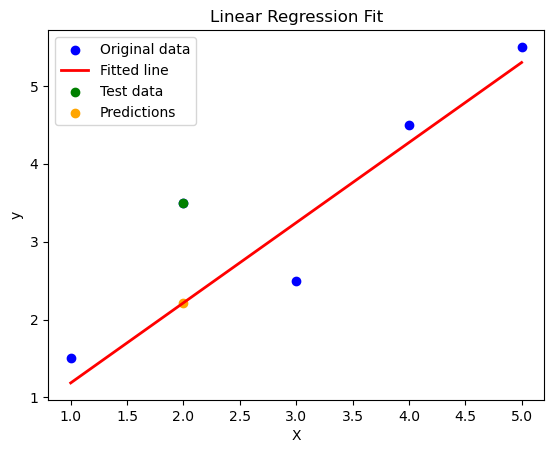

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1.5, 3.5, 2.5, 4.5, 5.5])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plotting the data and the fitted line
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Fitted line')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, y_pred, color='orange', label='Predictions')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()



## Classification

Accuracy: 0.7555555555555555


/var/folders/n0/m10dw59d4032lxdypv97rqzr0000gw/T/ipykernel_54164/1108056262.py:46: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='x', label='Test')


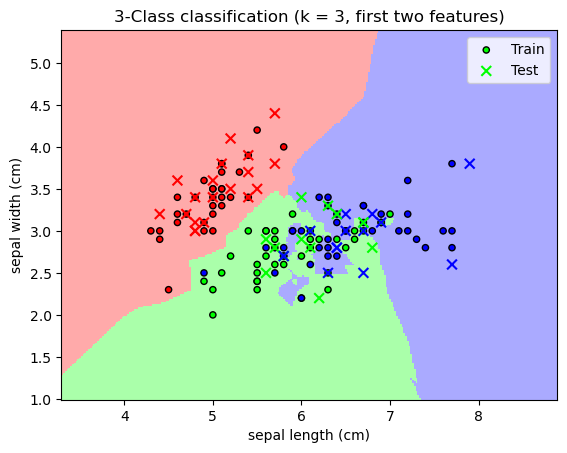

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the decision boundary
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='x', label='Test')

plt.title("3-Class classification (k = 3, first two features)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()


## Gradient descent example

Theta (model parameters): [[3.74519245]
 [3.13819342]]
Final cost: 4651.829641053213


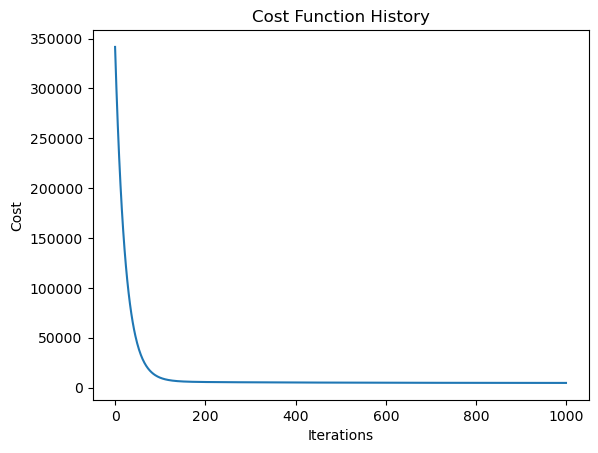

In [7]:
import numpy as np

# Example cost function (Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot(predictions - y))
        cost_history[i] = cost_function(X, y, theta)
    
    return theta, cost_history

# Sample data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add intercept term to X
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta = np.random.randn(2, 1)

# Perform Gradient Descent
theta, cost_history = gradient_descent(X_b, y, theta)

# Print the results
print("Theta (model parameters):", theta)
print("Final cost:", cost_history[-1])

# Plot cost history
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()


## Spreadhsheet data example

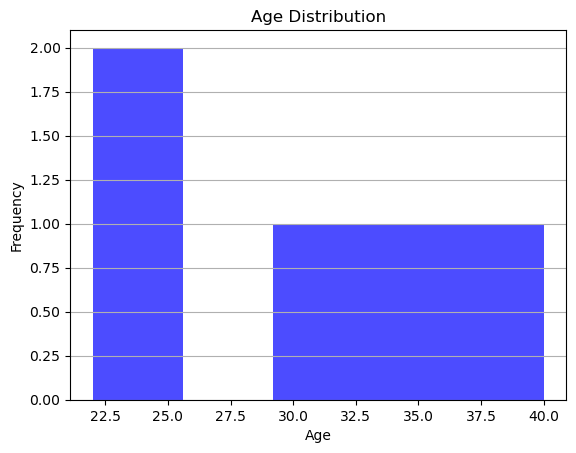

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Age': [24, 30, 35, 22, 40]}
df = pd.DataFrame(data)

# Plotting the histogram
plt.hist(df['Age'], bins=5, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


In [11]:
df

,Name,Age
0,Alice,24
1,Bob,30
2,Charlie,35
3,David,22
4,Eve,40


## Spreadsheet data - ML

### Linear regression

Mean Squared Error: 168316047.18603644
Mean Absolute Error: 11626.475591773908
R-squared Score: 0.9884573742743393


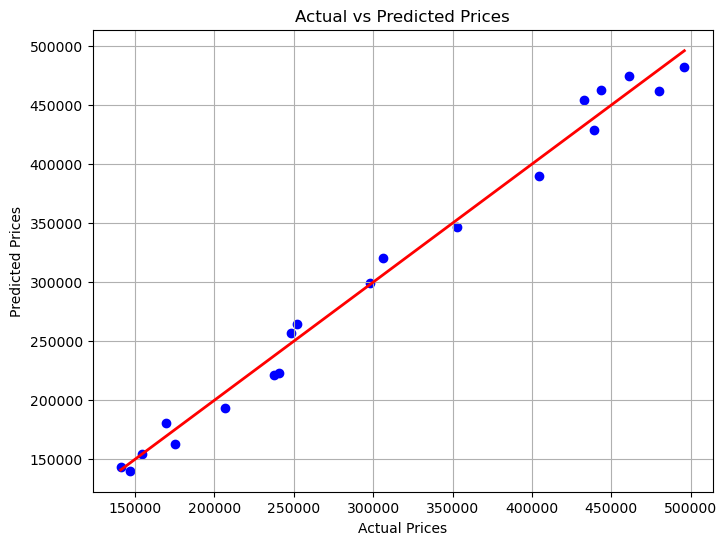

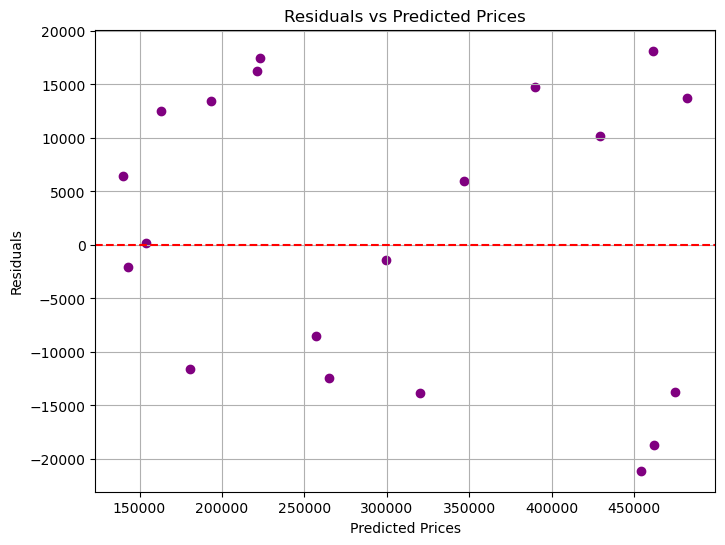

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Generate 100 data points for the example
np.random.seed(42)
sizes = np.random.randint(1000, 5000, size=100)
bedrooms = np.random.randint(1, 6, size=100)
prices = sizes * 100 + bedrooms * 5000 + np.random.randint(-20000, 20000, size=100)

data = {'Size': sizes, 'Bedrooms': bedrooms, 'Price': prices}
df = pd.DataFrame(data)

# Features and target variable
X = df[['Size', 'Bedrooms']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Visualizing Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Visualizing Residuals
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


## Text data example

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

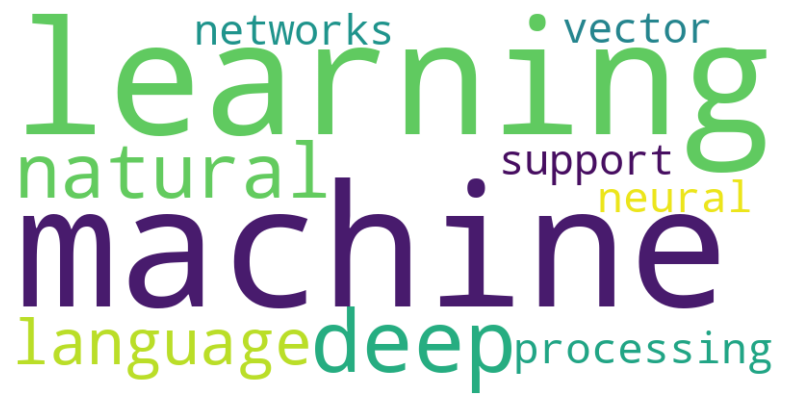

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text = "machine learning deep learning natural language processing neural networks support vector machines"

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Text data - ML example

Accuracy: 0.4166666666666667


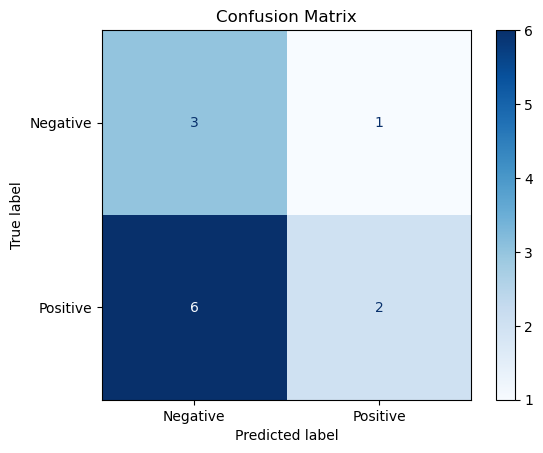

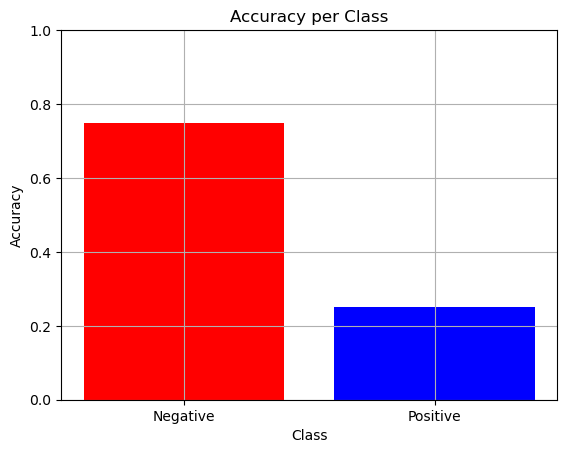

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Extended sample data with 40 data points
data = {
    'Review': [
        'I love this movie!', 'This was a terrible movie', 'Amazing performance!',
        'Worst film ever', 'Absolutely fantastic!', 'Not my cup of tea',
        'Brilliant, will watch again', 'Too slow and boring', 'Incredible story and visuals',
        'Poor acting and script', 'Loved every moment', 'Waste of time',
        'A masterpiece', 'Disappointing', 'Exceeded my expectations',
        'Not worth the hype', 'A beautiful journey', 'It was okay, not great',
        'Horrible direction', 'Breathtaking experience', 'Mediocre at best',
        'Unforgettable!', 'Just average', 'Awful, never again',
        'Thrilling and intense!', 'Boring plot, not engaging', 'Marvelous acting and plot',
        'Unimpressive', 'Top-notch production!', 'Dull and lifeless',
        'A visual treat', 'Not as good as expected', 'Great for the family',
        'Too violent for my taste', 'An inspiring story', 'Predictable ending',
        'Simply outstanding', 'Left me in tears', 'Overrated', 'A solid choice for a night in'
    ],
    'Sentiment': [
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1
    ]
}
df = pd.DataFrame(data)

# Features and target variable
X = df['Review']
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Text processing and model pipeline with TF-IDF and SVM
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model training with SVM
model = SVC(kernel='linear', class_weight='balanced', probability=True)
model.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Bar chart for class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.bar(['Negative', 'Positive'], class_accuracy, color=['red', 'blue'])
plt.title('Accuracy per Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()
